In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [2]:
x = {
    "a":1
}

node_one {'seed': 1}
node_two {'seed': 1}
node_four {}
                        +-----------+                    
                        | __start__ |                    
                        +-----------+                    
                               *                         
                               *                         
                               *                         
                         +----------+                    
                         | node_one |                    
                         +----------+                    
                               *                         
                               *                         
                               *                         
                         +----------+                    
                         | node_two |.                   
                      ...+----------+ ....               
                 .....         .          ....           
              ...

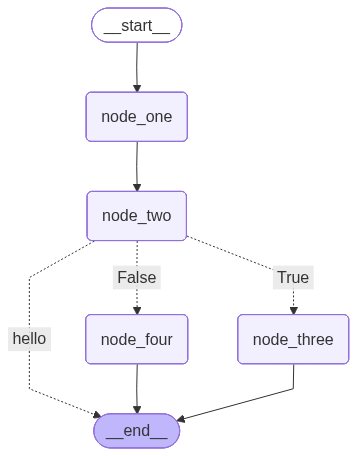

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict
from typing import Annotated, Literal
import operator
from langgraph.types import  CachePolicy
from langgraph.cache.memory import InMemoryCache
from datetime import  datetime
import time


def update_function(old, new):
    print("old->", old)
    print("new->", new)
    return old + new

class State(TypedDict):
    seed : int

graph_builder = StateGraph(State)

def node_one(state: State):
    print("node_one",state)
    return {}
def node_two(state: State):
    print("node_two",state)
    return {}
    
def node_three(state: State):
    print("node_three",state)   
    return {}

def node_four(state: State):
    print("node_four",state)   
    return {}
    
'''
def node_five(state: OutputState):
    return{
        "secret": True
    }

def node_six(state: MegaPrivate):
    print(state)
'''


graph_builder.add_node("node_one", node_one)
graph_builder.add_node("node_two", node_two, cache_policy= CachePolicy(ttl=20))
graph_builder.add_node("node_three", node_three)

graph_builder.add_node("node_four", node_four)
'''
graph_builder.add_node("eee", node_five)
graph_builder.add_node("fff", node_six)
'''
'''
def decide_path(state:State)-> Literal["node_three","node_four"]:
    if state["seed"] %2 ==0:
        return "node_three"
    else:
        return "node_four"
'''
def decide_path(state: State):
    return state["seed"] %2 ==0

graph_builder.add_edge(START, "node_one")
graph_builder.add_edge("node_one", "node_two")
graph_builder.add_conditional_edges("node_two", decide_path,{True:"node_three",False:"node_four","hello":END,})
graph_builder.add_edge("node_four", END)
'''
graph_builder.add_edge("eee", "fff")
graph_builder.add_edge("fff", END)
'''

graph.invoke({"seed":1})
graph = graph_builder.compile()

print(graph.get_graph().draw_ascii())
#print("result:", result)

#graph.get_graph().draw_ascii()

graph
